In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math, time, random, datetime
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('Data/train.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

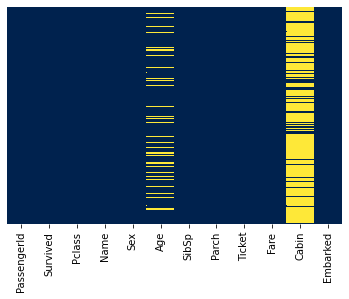

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='cividis',cbar=False)

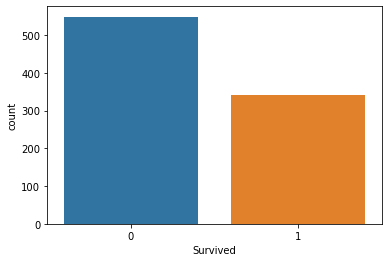

In [14]:
sns.countplot(x='Survived',data=df)

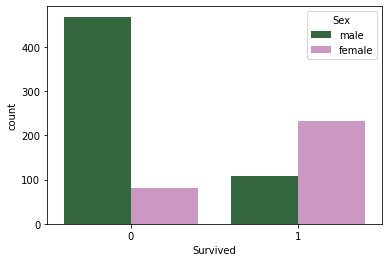

In [13]:
sns.countplot(x='Survived',hue='Sex',data=df,palette='cubehelix')

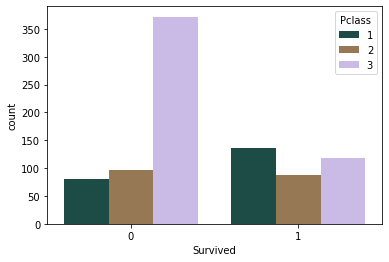

In [15]:
sns.countplot(x='Survived',hue='Pclass',data=df,palette='cubehelix')

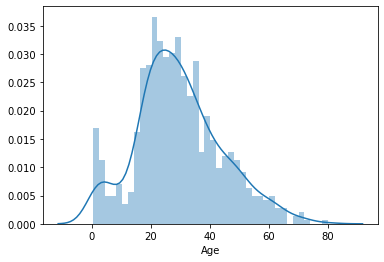

In [22]:
sns.distplot(df['Age'].dropna(),kde=True,bins=40)

### Data Preprocessing

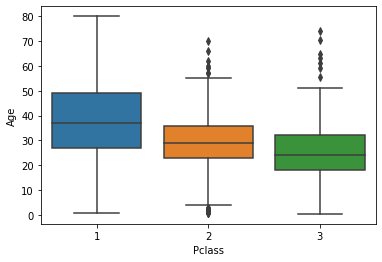

In [24]:
sns.boxplot(x='Pclass',y='Age',data=df)

In [25]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 29
        else:
            return 25
    else:
        return Age
        

In [26]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

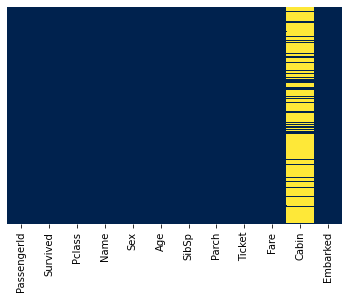

In [27]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='cividis',cbar=False)

In [30]:
df.drop('Cabin',axis=1,inplace=True)

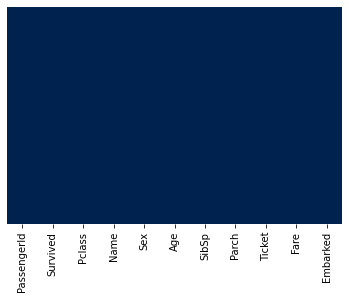

In [31]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='cividis',cbar=False)

In [33]:
df.dropna(inplace=True)

### Converting Categorical Variables 

In [34]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
embarked=pd.get_dummies(df['Embarked'],drop_first=True)

In [37]:
df.drop(['Sex','Name','Ticket','Embarked'],inplace=True,axis=1)

In [38]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [65]:
df=pd.concat([df,sex,embarked],axis=1)


In [66]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Train Test Split 

In [67]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.30, 
                                                    random_state=101)

### Logistic Regression 

In [134]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [135]:
predictions = logmodel.predict(X_test)

In [136]:
accuracy=confusion_matrix(y_test,predictions)

In [137]:
accuracy

array([[151,  12],
       [ 39,  65]], dtype=int64)

In [138]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8089887640449438

In [139]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86       163
           1       0.84      0.62      0.72       104

    accuracy                           0.81       267
   macro avg       0.82      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



### K-Nearest Neighbours 

In [79]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [80]:
predictions_knn = knn.predict(X_test)

In [82]:
accuracy_knn=accuracy_score(y_test,predictions_knn)
accuracy_knn

0.6217228464419475

In [83]:
print(classification_report(y_test,predictions_knn))

              precision    recall  f1-score   support

           0       0.66      0.79      0.72       163
           1       0.52      0.36      0.42       104

    accuracy                           0.62       267
   macro avg       0.59      0.57      0.57       267
weighted avg       0.60      0.62      0.60       267



### Decision Tree Classifier 

In [85]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [86]:
predictions_dt = dt.predict(X_test)

In [87]:
accuracy_dt=accuracy_score(y_test,predictions_dt)
accuracy_dt

0.7490636704119851

In [88]:
print(classification_report(y_test,predictions_dt))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       163
           1       0.67      0.69      0.68       104

    accuracy                           0.75       267
   macro avg       0.74      0.74      0.74       267
weighted avg       0.75      0.75      0.75       267



### Gaussian Naive Bayes 

In [90]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [91]:
predictions_gnb = gnb.predict(X_test)

In [92]:
accuracy_gnb=accuracy_score(y_test,predictions_gnb)
accuracy_gnb

0.8052434456928839

In [93]:
print(classification_report(y_test,predictions_gnb))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       163
           1       0.79      0.68      0.73       104

    accuracy                           0.81       267
   macro avg       0.80      0.78      0.79       267
weighted avg       0.80      0.81      0.80       267



### Linear Support Vector Machines 

In [95]:
svc=LinearSVC()
svc.fit(X_train,y_train)

LinearSVC()

In [96]:
predictions_svc = svc.predict(X_test)

In [97]:
accuracy_svc=accuracy_score(y_test,predictions_svc)
accuracy_svc

0.7940074906367042

In [100]:
print(classification_report(y_test,predictions_svc))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       163
           1       0.85      0.58      0.69       104

    accuracy                           0.79       267
   macro avg       0.81      0.75      0.77       267
weighted avg       0.80      0.79      0.78       267



## Gradient Boosting Classifier

In [102]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [103]:
predictions_gbc = gbc.predict(X_test)

In [104]:
accuracy_gbc=accuracy_score(y_test,predictions_gbc)
accuracy_gbc

0.846441947565543

In [105]:
print(classification_report(y_test,predictions_gbc))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       163
           1       0.85      0.74      0.79       104

    accuracy                           0.85       267
   macro avg       0.85      0.83      0.83       267
weighted avg       0.85      0.85      0.84       267



## Random Forest Classifier

In [110]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [111]:
predictions_rfc = rfc.predict(X_test)

In [112]:
accuracy_rfc=accuracy_score(y_test,predictions_rfc)
accuracy_rfc

0.850187265917603

In [113]:
print(classification_report(y_test,predictions_rfc))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       163
           1       0.86      0.74      0.79       104

    accuracy                           0.85       267
   macro avg       0.85      0.83      0.84       267
weighted avg       0.85      0.85      0.85       267



In [124]:
## Hyper parameter tuning the random forest classifier as it gives the highest accuracy so far
param_grid = {"n_estimators": [5, 40, 42],
              "max_depth": [5, 6],
              "min_samples_split": [5, 10],
              "min_samples_leaf": [3, 5],
              "max_leaf_nodes": [14, 15]}

grid_search_forest = GridSearchCV(rfc, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 6], 'max_leaf_nodes': [14, 15],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [5, 10],
                         'n_estimators': [5, 40, 42]},
             scoring='neg_mean_squared_error')

In [125]:
#now let's how the RMSE changes for each parameter configuration
cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.4742741779854116 {'max_depth': 5, 'max_leaf_nodes': 14, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 5}
0.4261065832353423 {'max_depth': 5, 'max_leaf_nodes': 14, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 40}
0.4408714546542221 {'max_depth': 5, 'max_leaf_nodes': 14, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 42}
0.4552982176265204 {'max_depth': 5, 'max_leaf_nodes': 14, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 5}
0.4318656463623108 {'max_depth': 5, 'max_leaf_nodes': 14, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 40}
0.43171741720182216 {'max_depth': 5, 'max_leaf_nodes': 14, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 42}
0.4464400920172478 {'max_depth': 5, 'max_leaf_nodes': 14, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 5}
0.4334632913952451 {'max_depth': 5, 'max_leaf_nodes': 14, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 40}

In [126]:
grid_search_forest.best_estimator_

RandomForestClassifier(max_depth=5, max_leaf_nodes=14, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=42)

In [127]:
grid_best= RandomForestClassifier(max_depth=5, max_leaf_nodes=14, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=42)
grid_best.fit(X_train,y_train)


RandomForestClassifier(max_depth=5, max_leaf_nodes=14, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=42)

In [128]:
predictions_grid_best = grid_best.predict(X_test)

In [129]:
accuracy_grid_best=accuracy_score(y_test,predictions_grid_best)
accuracy_grid_best

0.8277153558052435

In [130]:
print(classification_report(y_test,predictions_grid_best))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       163
           1       0.86      0.66      0.75       104

    accuracy                           0.83       267
   macro avg       0.84      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



### Regular accuracy scores

In [146]:
models = pd.DataFrame({
'Model': ['Logistic Regression','KNN','Decision Tree', 'Gaussian Naive Bayes', 'Linear SVC', 'Gradient Boosting Trees',
              'Random Forest Classifier'],
    'Score': [
        round(accuracy * 100, 2), 
        round(accuracy_knn * 100, 2),  
        round(accuracy_dt * 100, 2), 
        round(accuracy_gnb * 100, 2), 
        round(accuracy_svc * 100, 2), 
        round(accuracy_gbc * 100, 2),
        round(accuracy_rfc * 100, 2)
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False).style.hide_index()

---Reuglar Accuracy Scores---


Model,Score
Random Forest Classifier,85.020000
Gradient Boosting Trees,84.640000
Logistic Regression,80.900000
Gaussian Naive Bayes,80.520000
Linear SVC,79.400000
Decision Tree,74.910000
KNN,62.170000


### Feature Importance

In [148]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    

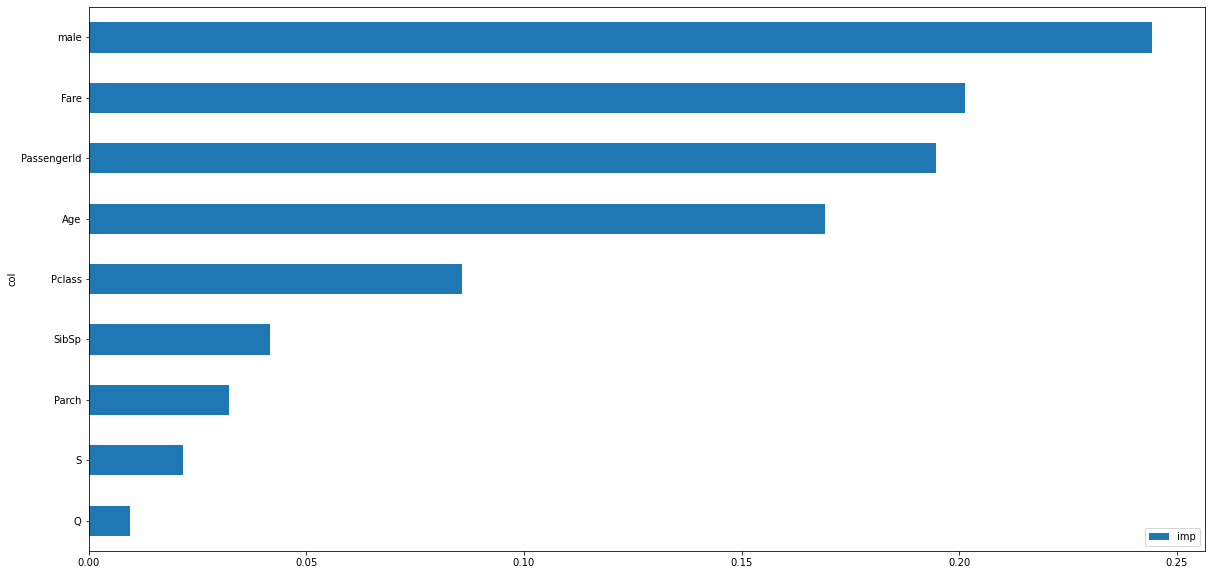

In [151]:
# Plot the feature importance scores
feature_importance(rfc, X_train)
plt.savefig('rfc.png')

### Submission 

In [217]:
test_df=pd.read_csv('Data/test.csv')

In [218]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [219]:
test_df.fillna(X_test.mean(),inplace=True)

In [220]:
test_df.drop('Cabin',inplace=True,axis=1)

In [221]:
sex=pd.get_dummies(test_df['Sex'],drop_first=True)
embarked=pd.get_dummies(test_df['Embarked'],drop_first=True)

In [222]:
test_df.drop(['Sex','Name','Ticket','Embarked'],inplace=True,axis=1)

In [223]:
test_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875


In [224]:
test_df=pd.concat([test_df,sex,embarked],axis=1)

In [225]:
test_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [226]:
final_predictions = rfc.predict(test_df)

In [227]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test_df['PassengerId']
submission['Survived'] = final_predictions # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [229]:
gender_submission=pd.read_csv('Data/gender_submission.csv')
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [230]:
# Let's convert our submission dataframe 'Survived' column to ints
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [231]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [233]:
# Are our test and submission dataframes the same length?
if len(submission) == len(test_df):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [234]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('../submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [235]:
# Check the submission csv to make sure it's in the right format
submissions_check = pd.read_csv("../submission.csv")
submissions_check.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
